#1. 결측값 처리

통계학 적으로 데이터를 처리하는 기법 중에서 결측값 처리가 있습니다.
결측값을 처리하는 방법은 다음과 같습니다.

* 데이터 일괄 제거
* 보간법으로 인한 값 대체
* 결측값 -> 특이값으로 대체 등

여러 방법이 있는데요. 우리가 배웠던 통계적인 수치를 통해 대체하는 법을 배워봅시다.

In [ ]:
pip install --upgrade pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/daily-bike-sharing
df = pd.read_csv("/content/bike_sharing_daily.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [ ]:
# 각 컬럼의 속성 및 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [ ]:
# 결측값 수만 확인
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [ ]:
# 결측값 표본 제거

# 모든 컬럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

df_drop_all.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [ ]:
# 특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

df_drop_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp         24
hum           25
windspeed     12
casual        10
registered    11
cnt            0
dtype: int64

In [ ]:
# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how='any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
## 결측값 기본 대치 방법들

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 컬럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 컬럼
df_mean_all = df.fillna(df.mean())

# 평균값 대치 - 컬럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean()})

# 중앙값 대치 - 전체 컬럼
df_median_all = df.fillna(df.median())

# 중앙값 대치 - 컬럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median()})

# 최빈값 대치 - 전체 컬럼
df_mode_all = df.fillna(df.mode())

# 최빈값 대치 - 컬럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 컬럼
df_max_all = df.fillna(df.max())

# 최댓값 대치 - 컬럼 지정
df_max_slt = df.fillna({'temp':df['temp'].max()})

# 최솟값 대치 - 전체 컬럼
df_min_all = df.fillna(df.min())

# 최솟값 대치 - 컬럼 지정
df_min_slt = df.fillna({'temp':df['temp'],'hum':df['hum'].min()})


df_min_slt.isnull().sum()

<ipython-input-17-ecf54436e061>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_all = df.fillna(df.mean())
<ipython-input-17-ecf54436e061>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median_all = df.fillna(df.median())


instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

#2. 이상치 처리

이상치란 일부 관측치의 값이 전체 데이터의 범위를 뛰어넘는 값을 의미합니다. 아주 작거나 아주 크거나 딱 봐도 이상한 값(99999999 등)을 나타냅니다.

이상치는 해당값을 결측값으로 대체한 다음 결측치처리를 할수도 있고, 해당 이상치를 제거하는 방법을 사용합니다.

관측값을 상한값을 두어서 변경할수도 있고, 가중치를 조정하는 방법도 사용합니다.

이상치의 파악은 EDA나 데이터시각화, 박스플롯등으로 파악할 수 있고, 분석 도메인을 그만큼 잘 숙지해야하며, 또한 기본적인 데이터에 대한 생각을 잘 해야합니다. 예를 들어 200세가 넘는 데이터가 있다던가 자산이 100조원이 넘는 사람이라던가 이런 데이터에 대해 의심하는 습관을 들여야 합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 셋 생성
data = np.array([12, 15, 14, 13, 16, 14, 18, 15, 1000, 17, 16])

# 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# z 점수 계산 (각 값에서 평균을 빼고 표준편차로 나눔)
z_scores = (data - mean) / std_dev

# 이상치를 찾기 위한 임계값 설정 (보통 절대값 3 이상을 이상치로 간주)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(data, 'bo-', label='data')
plt.plot(outliers, data[outliers], 'ro', ms=10, label='outliers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


위 코드는 먼저 1%의 이상치 개수를 계산하고, 그 개수를 제외한 나머지를 정규 분포로부터 생성합니다. 그 후 이상치를 -100에서 300 사이의 값으로 설정하고, 이를 모든 데이터와 합칩니다. 결과적으로 이상치는 주어진 범위 내에서 무작위로 분포하게 됩니다. 이는 이상치의 정의와 특성에 따라 변경될 수 있습니다. 이 방법은 이상치가 정규 분포의 꼬리에 놓인 것처럼 보이게 하므로, 이상치 검출 알고리즘이 이를 찾아내는지 확인하는 데 유용할 수 있습니다.

In [ ]:
import numpy as np
import pandas as pd

# 데이터셋 설정
n = 1000  # 전체 데이터 개수
outlier_fraction = 0.1  # 이상치 비율

# 이상치 개수 계산
n_outliers = int(n * outlier_fraction)

# 정상 데이터와 이상치 생성
normal_data = np.random.randint(low=50, high=150, size=n - n_outliers)  # 50에서 150 사이의 정수에서 샘플링
outliers = np.random.randint(low=-100, high=200, size=n_outliers)  # -100에서 300 사이의 정수에서 샘플링

# 데이터 결합
data = np.concatenate([normal_data, outliers])

# 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['Data'])

In [ ]:
df

,Data
0,79
1,147
2,63
3,69
4,91
...,...
995,-32
996,-64
997,-76
998,117


In [ ]:
# 딱 봐도 이상한 데이터셋
df['Data'].describe()

count    1000.000000
mean       94.749000
std        39.469632
min       -94.000000
25%        71.000000
50%        96.000000
75%       124.000000
max       199.000000
Name: Data, dtype: float64

In [ ]:
import seaborn as sns
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'Data', data = df)
plt.show()

In [ ]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = df['Data'].quantile(0.25)
Q3 = df['Data'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위.
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['Data'] >= Q1 - rev_range * IQR) & (df['Data'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['Data'].describe())
print(df_rmv['Data'].describe())

count    1000.000000
mean       94.749000
std        39.469632
min       -94.000000
25%        71.000000
50%        96.000000
75%       124.000000
max       199.000000
Name: Data, dtype: float64
count    999.000000
mean      94.937938
std       39.034338
min      -85.000000
25%       71.000000
50%       96.000000
75%      124.000000
max      199.000000
Name: Data, dtype: float64


In [ ]:
# 이상치 제거 후 박스플롯 시각화

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'Data', data = df_rmv)
plt.show()

In [ ]:
# 다음과 같은 방식도 있고, 너무 극도의 이상치인 경우 if문 등으로도 제외해도 됩니다.
# 그에 따른 타당성이나 이력을 남기는것은 필수 입니다.

#3. 변수 구간화(Varaible Binning)

나이와 같은 데이터의 경우 나이를 그대로 사용하는 경우도 있지만 구간을 나눠서 10대, 20대, 30대 등으로 묶어서 사용하기 합니다.

이러한 데이터 구간화는 향후 데이터 EDA를 풍성하게 할 수 있고, 분석의 양을 줄일 수도 있습니다.

이산형 변수를 범주형 변수로 바꿀때는 이 변수가 비즈니스적으로 해석, 예측시 필수적인가를 고려하고
구간화를 균일하게 했는가를 잘 파악해야합니다.

우리는 보통 WOE(Weight of Evidence)나 IV값을 통해(information Value) 측정할 수 있습니다. IV가 높을수록 종속변수를 잘 구분할 수 있다 라는 의미이므로, 구간화가 잘되면 IV값이 높아질수밖에 없습니다.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)

# 데이터셋 설정
n = 1000  # 전체 데이터 개수
default_fraction = 0.1  # 기본값 설정 비율

# 이 변수들은 랜덤하게 생성되지만, 실제로는 데이터에 따라 다르게 설정해야 합니다.
age = np.random.randint(low=20, high=70, size=n)  # 나이: 20세에서 70세 사이의 정수
income = np.random.randint(low=20000, high=100000, size=n)  # 소득: 20000에서 100000 사이의 정수

# 기본값 설정을 랜덤하게 결정 (10%가 기본값 설정)
default = np.random.choice([0, 1], size=n, p=[1-default_fraction, default_fraction])

# 데이터프레임으로 변환
df = pd.DataFrame({'Age': age, 'Income': income, 'Default': default})

# 데이터프레임 출력
print(df.head())
#위의 코드는 'Age', 'Income' 그리고 'Default'라는 세 개의 열을 가진 DataFrame을 생성합니다. 'Default' 열은 목표 변수로, 고객이 기본값을 설정했는지 여부를 나타냅니다.



   Age  Income  Default
0   64   72677        0
1   67   22963        0
2   20   66870        0
3   23   80781        1
4   23   60843        0


In [ ]:
# BMI 컬럼의 분포 확인

df['Age'].describe()

count    1000.000000
mean       44.157000
std        14.458402
min        20.000000
25%        31.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

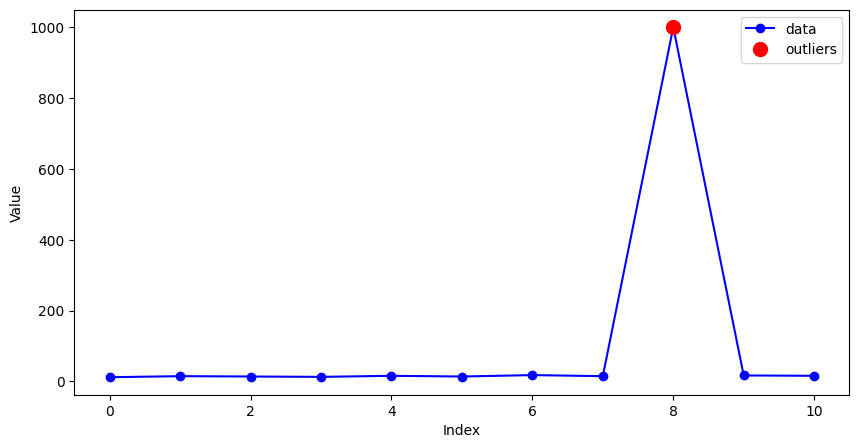

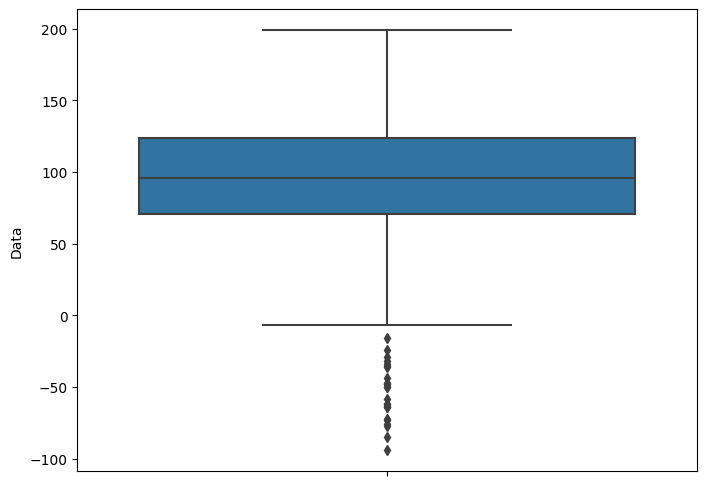

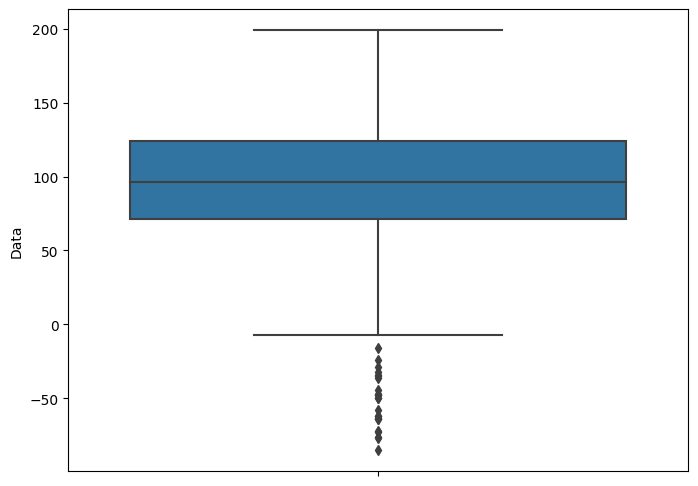

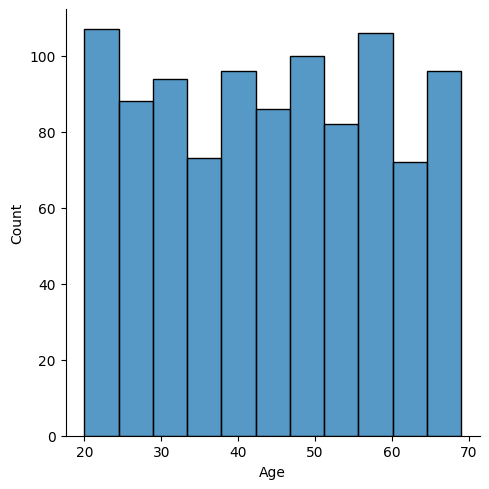

In [ ]:
# BMI 컬럼 분포 시각화

%matplotlib inline
sns.displot(df['Age'])

In [ ]:
# 임의로 단순 구간화

df1 = df.copy() # 데이터셋 복사

# 구간화용 빈 컬럼 생성 - 생략해도 되지만 바로 옆에 붙여 보기 위함
df1.insert(2, 'Age_bin', 0)

df1.loc[df1['Age'] <= 20, 'Age_bin'] = '1.20_Under'
df1.loc[(df1['Age'] > 20) & (df1['Age'] <= 30), 'Age_bin'] = '2.20'
df1.loc[(df1['Age'] > 30) & (df1['Age'] <= 40), 'Age_bin'] = '3.30'
df1.loc[(df1['Age'] > 40) & (df1['Age'] <= 50), 'Age_bin'] = '4.40'
df1.loc[(df1['Age'] > 50) & (df1['Age'] <= 60), 'Age_bin'] = '5.50'
df1.loc[df1['Age'] > 60, 'Age_bin'] = '6.60_Upper'

df1.head()

,Age,Income,Age_bin,Default
0,64,72677,6.60_Upper,0
1,67,22963,6.60_Upper,0
2,20,66870,1.20_Under,0
3,23,80781,2.20,1
4,23,60843,2.20,0


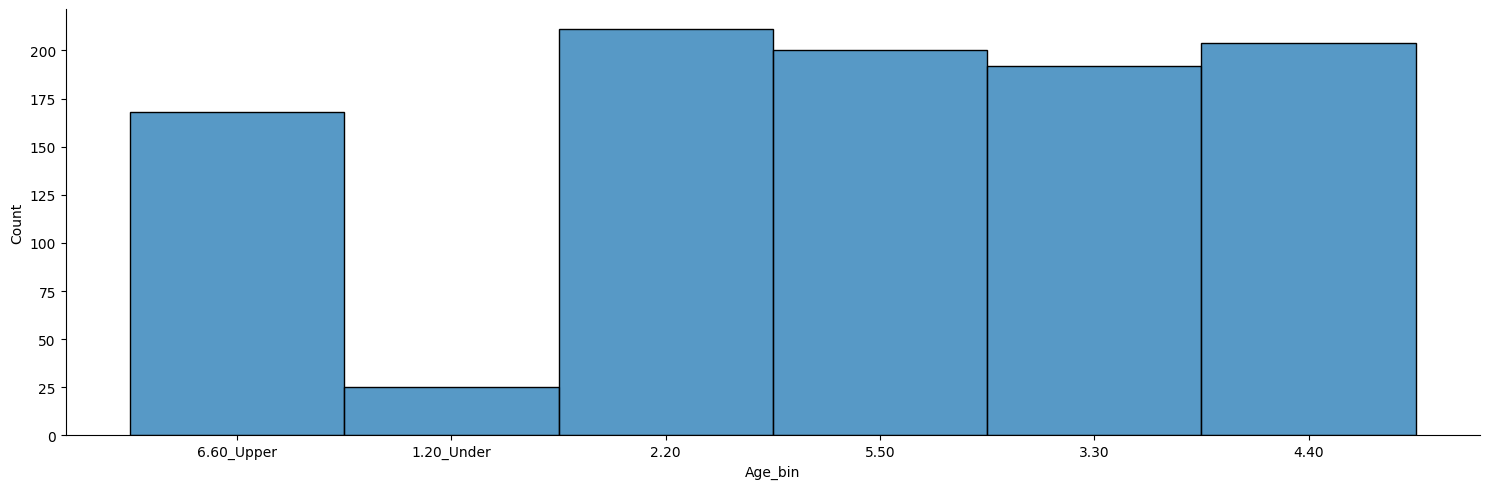

In [ ]:
# 구간화 변수 분포 시각화

sns.displot(df1['Age_bin'],height = 5, aspect = 3)

In [ ]:
#  cut() 함수 사용하여 임의로 구간화
df1.insert(3, 'Age_bin2', 0) # 구간화용 빈 컬럼 생성

df1['Age_bin2'] = pd.cut(df1.Age, bins=[0, 7, 19, 34, 49, 60, 100]
                         , labels=['a', 'b', 'c', 'd', 'e', 'f'])

df1.head()

,Age,Income,Age_bin,Age_bin2,Default
0,64,72677,6.60_Upper,f,0
1,67,22963,6.60_Upper,f,0
2,20,66870,1.20_Under,c,0
3,23,80781,2.20,c,1
4,23,60843,2.20,c,0


In [ ]:
# BMI_bin2 구간 별 관측치 수 집계

df1.Age_bin2.value_counts().to_frame().style.background_gradient(cmap='winter')

,Age_bin2
d,305
c,302
e,225
f,168
a,0
b,0


In [ ]:
# qcut() 함수 사용하여 자동 구간화
df1.insert(4, 'Age_bin3', 0) # 구간화용 빈 컬럼 생성

df1['Age_bin3'] = pd.qcut(df1.Age, q=7, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df1.head()

,Age,Income,Age_bin,Age_bin2,Age_bin3,Default
0,64,72677,6.60_Upper,f,g,0
1,67,22963,6.60_Upper,f,g,0
2,20,66870,1.20_Under,c,a,0
3,23,80781,2.20,c,a,1
4,23,60843,2.20,c,a,0


In [ ]:
# Age_bin3 구간 별 관측치 수 집계

df1.Age_bin3.value_counts().to_frame().style.background_gradient(cmap='winter')

,Age_bin3
a,154
c,154
f,144
e,142
d,141
b,135
g,130


In [ ]:
https://data-newbie.tistory.com/440

SyntaxError: ignored

In [ ]:
# WOE를 사용한 변수 구간화

df2 = df.copy()  # 데이터셋 복사


# xverse 함수 적용을 위한 더미변수 변환
df2=pd.get_dummies(df)

# 구간화 할 컬럼(X), 기준 컬럼(y) 지정
X = df2[['Income']]
y = df2[['Default']]

y = y.T.squeeze() # 차원 축소

# WOE 모델 설정 및 적용
clf = WOE()
clf.fit(X, y)

# 구간 기준점 및 eight of Evidence 값 테이블 생성
a=clf.woe_df

#Information Value 데이블 생성
b=clf.iv_df

a.head()

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,Income,"(20130.999, 45898.0]",334,38,296,0.113772,0.886228,0.339286,0.333333,0.01770,0.005692
1,Income,"(45898.0, 72677.0]",333,40,293,0.120120,0.879880,0.357143,0.329955,0.07918,0.005692
2,Income,"(72677.0, 99850.0]",333,34,299,0.102102,0.897898,0.303571,0.336712,-0.10361,0.005692


In [ ]:
print(pd.__version__)

In [ ]:
WOE를 활용한 구간화 기준은 현재 데이터에서는 낮지만, 타겟변수에 대한 강력함이 있으면 더더욱 IV가 높아질수 있습니다.
# Binning에 대한 얘기 추가

In [ ]:
import random

# 40명의 사람들을 1부터 40까지의 번호로 가정
people = list(['정우용', '이승준', '조민재', '박규리', '황소연',
              '이지은', '양다현', '홍채영', '김태리', '유설완',
               '황금성', '하혜림', '김태호', '이재호', '황상엽',
               '장우혁', '정진우', '김하연', '김수민', '조준희',
               '박재혁', '조연경', '송유림', '정서영', '이혜정',
               '임훈', '이예진', '김병우', '윤나요', '김예린',
               '함승주', '강병주', '민윤홍', '정민규', '이양석',
               '이윤지', '김민정', '김민수'])

# 팀을 무작위로 구성
random.shuffle(people)

# 8개의 팀으로 분배
teams = [people[i::8] for i in range(8)]

# 팀의 구성 출력
for i, team in enumerate(teams, start=1):
    print(f"팀 {i}: {team}")

팀 1: ['송유림', '김민정', '조준희', '유설완', '박규리']
팀 2: ['임훈', '장우혁', '황금성', '홍채영', '정우용']
팀 3: ['이윤지', '김예린', '조연경', '정진우', '정민규']
팀 4: ['양다현', '박재혁', '이승준', '김하연', '이예진']
팀 5: ['김병우', '김태호', '김수민', '민윤홍', '김태리']
팀 6: ['정서영', '이재호', '황상엽', '강병주', '이지은']
팀 7: ['이혜정', '김민수', '조민재', '황소연']
팀 8: ['함승주', '하혜림', '윤나요', '이양석']


NameError: ignored